# Text to Image Generation with LLMs , Stable Diffusion and Difffusers

In [1]:
#installing required libraries
!pip install diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt


In [3]:
!pip show torch

Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [5]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"
pipeline = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipeline = pipeline.to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
prompt="""dreamlikeart , Generate a series of realistic photographs that capture everyday moments in a genuine and relatable manner. Picture scenes of people going about their daily lives, candid expressions, and the beauty found in ordinary details """

In [7]:
image = pipeline(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[Prompt]: dreamlikeart , Generate a series of realistic photographs that capture everyday moments in a genuine and relatable manner. Picture scenes of people going about their daily lives, candid expressions, and the beauty found in ordinary details 


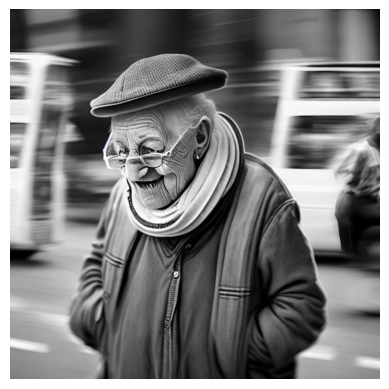

In [8]:
print("[Prompt]:",prompt)
plt.imshow(image)
plt.axis('off')
plt.show()

In [9]:
prompt2="""Generate an image that encapsulates the essence of tunisia. Showcase the intricate architecture of historic cities such as gafsa and tozeur, highlighting the region’s cultural richness. Set the image against the backdrop of the arid beauty of the tunisian Desert"""

In [11]:
image2=pipeline(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[Prompt]: Generate an image that encapsulates the essence of tunisia. Showcase the intricate architecture of historic cities such as gafsa and tozeur, highlighting the region’s cultural richness. Set the image against the backdrop of the arid beauty of the tunisian Desert


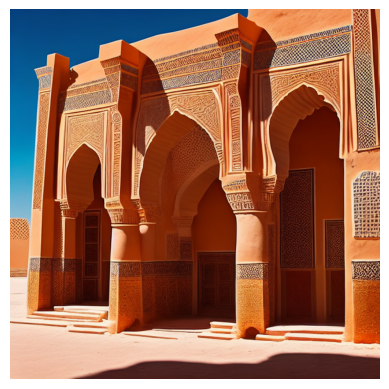

In [12]:
print("[Prompt]:",prompt2)
plt.imshow(image2);
plt.axis('off');
plt.show();

## Working with Stable Diffusion Parameters :
* Negative prompting
* num_inference_steps
* height
* wright
* num_images_per_prompt

In [13]:
def generate_image (pipeline , prompt , params):
  image = pipeline(prompt , **params).images
  num_images = len(image)
  if num_images > 1 :
    fig,ax = plt.subplots(nrows=1,ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(image[i])
      ax[i].axis('off')
  else:
    fig=plt.figure()
    plt.imshow(image[0])
    plt.axis('off')
  plt.tight_layout()

In [14]:
prompt=""" dreamlike ,picturesque garden adorned with diverse, vibrant flowers in full bloom. Capture the scene’s serenity, featuring meticulously arranged flower beds and meandering pathways. The scene should exude tranquility: A combination of meticulously arranged flower beds and meandering pathways """

  0%|          | 0/50 [00:00<?, ?it/s]

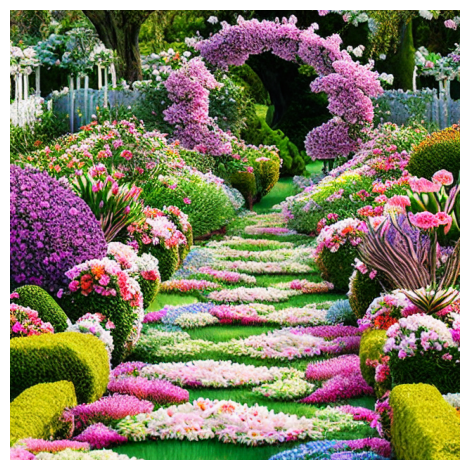

In [15]:
params={}
generate_image(pipeline,prompt,params)

  0%|          | 0/100 [00:00<?, ?it/s]

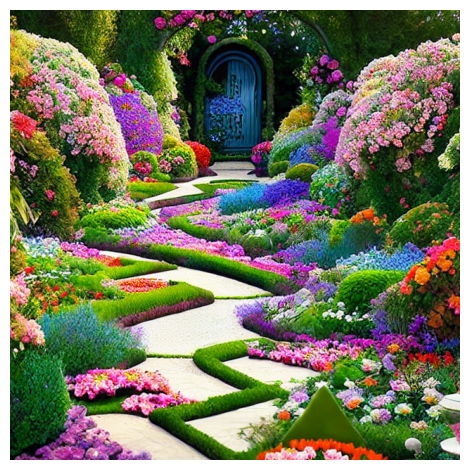

In [16]:
#num_inference_steps
params={"num_inference_steps":100}
generate_image(pipeline,prompt,params)

  0%|          | 0/50 [00:00<?, ?it/s]

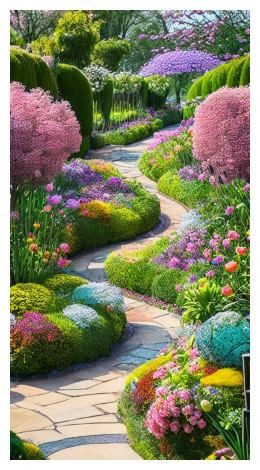

In [17]:
#height and width
params = {'num_inferences_steps':100,'height':int(1.5*640),'width':512}
generate_image(pipeline,prompt,params)

  0%|          | 0/50 [00:00<?, ?it/s]

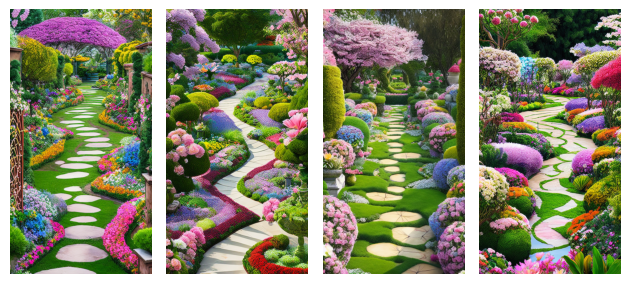

In [18]:
#num_images_per_prompt
params = {'num_inferences_steps':100,'height':int(1.5*640),'width':512,'num_images_per_prompt':4}
generate_image(pipeline,prompt,params)

  0%|          | 0/50 [00:00<?, ?it/s]

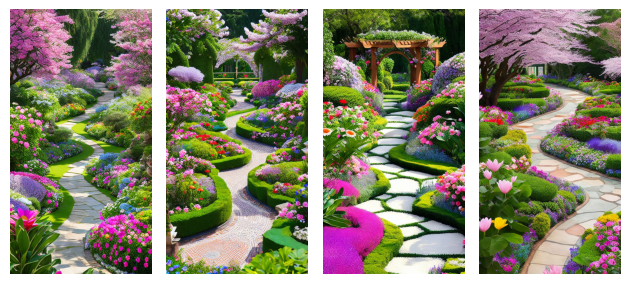

In [19]:
#negative_prompt
params = {'num_inferences_steps':100,'height':int(1.5*640),'width':512,'num_images_per_prompt':4,'negative_prompt':"distorted , low quality"}
generate_image(pipeline,prompt,params)